# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Import Data

In [3]:
# Path to main folder
path = r'C:\Users\jmacs\Documents\Career Foundry Tasks\KingCountySales'

In [4]:
# Import kc_house_data
kc_house_data = pd.read_csv(os.path.join(path, 'kc_house_data_clean.csv'), index_col = False)

In [5]:
kc_house_data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price category
0,0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,...,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650,Low price
1,1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,Middle price
2,2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,Low price
3,3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,...,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,Middle price
4,4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,...,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,Middle price


In [11]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21594 entries, 0 to 21593
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      21594 non-null  int64  
 1   id              21594 non-null  int64  
 2   date            21594 non-null  object 
 3   price           21594 non-null  int64  
 4   bedrooms        21594 non-null  int64  
 5   bathrooms       21594 non-null  float64
 6   sqft_living     21594 non-null  int64  
 7   sqft_lot        21594 non-null  int64  
 8   floors          21594 non-null  float64
 9   waterfront      21594 non-null  int64  
 10  view            21594 non-null  int64  
 11  condition       21594 non-null  int64  
 12  grade           21594 non-null  int64  
 13  sqft_above      21594 non-null  int64  
 14  sqft_basement   21594 non-null  int64  
 15  yr_built        21594 non-null  int64  
 16  yr_renovated    913 non-null    float64
 17  zipcode         21594 non-null 

In [12]:
# Create a subset excluding the unwanted columns

kc_sub = kc_house_data[['price', 'bedrooms', 'bathrooms', 'sqft_living15','sqft_lot15','floors', 'condition', 'grade']]

# 03. Elbow Technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(kc_sub).score(kc_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\jmacs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jmacs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jmacs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jmacs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-2926936718324921.5,
 -1370300116495361.5,
 -745590779859207.9,
 -476370917320535.9,
 -339954776760348.94,
 -253277654370156.4,
 -194801993792597.97,
 -151571693146882.88,
 -126379553035193.17]

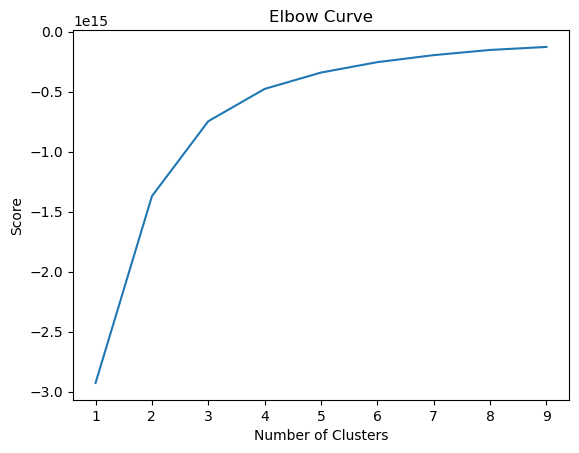

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
Optimal number of clusers would be 4.

# 04. K-means Clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(kc_sub)

C:\Users\jmacs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [18]:
# adding new column with clusters
kc_sub['clusters'] = kmeans.fit_predict(kc_sub)

C:\Users\jmacs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jmacs\AppData\Local\Temp\ipykernel_1360\2145126620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_sub['clusters'] = kmeans.fit_predict(kc_sub)


In [19]:
kc_sub.head()

,price,bedrooms,bathrooms,sqft_living15,sqft_lot15,floors,condition,grade,clusters
0,221900,3,1.00,1340,5650,1.0,3,7,0
1,538000,3,2.25,1690,7639,2.0,3,7,2
2,180000,2,1.00,2720,8062,1.0,3,6,0
3,604000,4,3.00,1360,5000,1.0,5,7,2
4,510000,3,2.00,1800,7503,1.0,3,8,0


In [20]:
# checking cluster counts
kc_sub['clusters'].value_counts()

clusters
0    12920
2     7257
1     1227
3      190
Name: count, dtype: int64

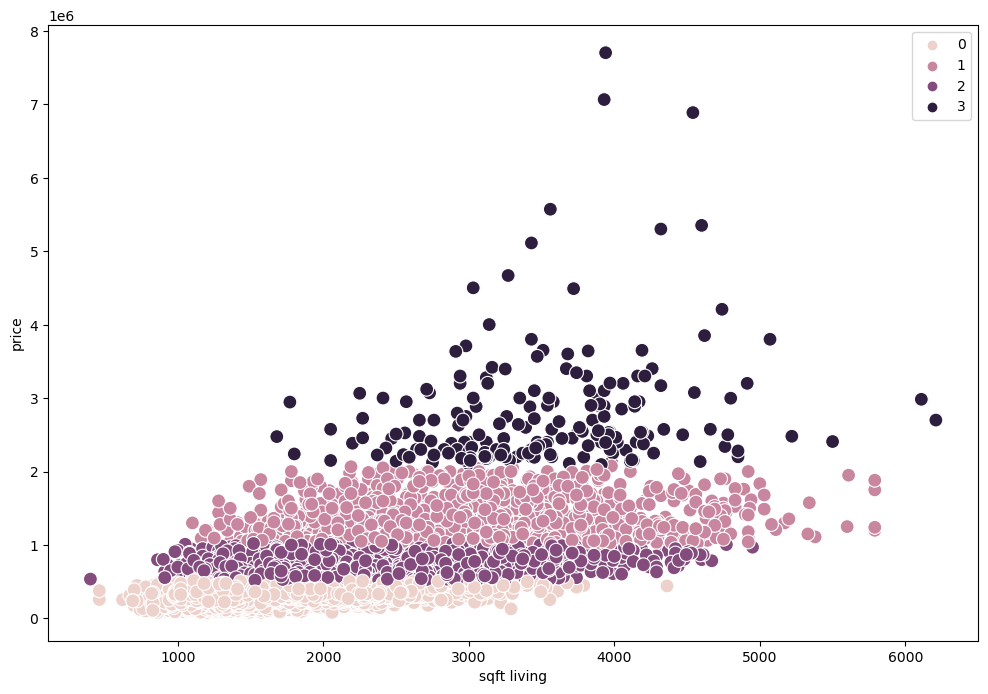

In [21]:
# Plot the clusters for the "price" and "sqft_living15" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kc_sub['sqft_living15'], y=kc_sub['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft living') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

Here we see that the majority of homes being sold were in the mid range price. We also see there is only one home in the low range price that are above 4000 sq ft. The high end homes were mostly clustered in the 2500 to 4500 sq ft range.

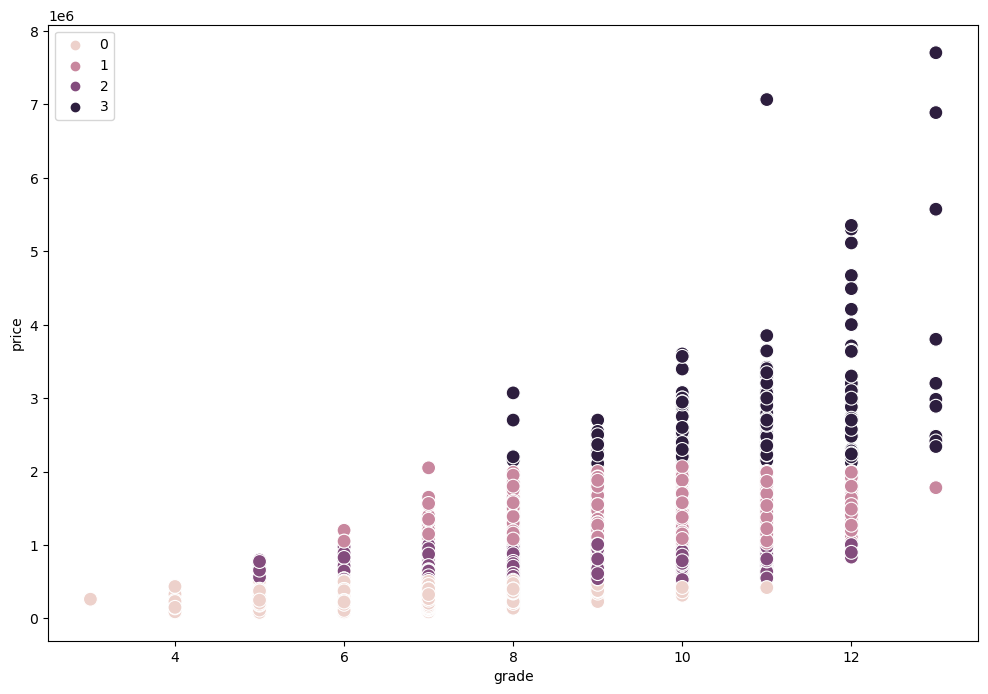

In [22]:
# Plot the clusters for the "price" and "grade" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kc_sub['grade'], y=kc_sub['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('grade') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

Here we see the majority of the homes sold were graded 7 to 12 with only one mid ranged home being at 13. All high priced homes were graded 8 and above with the majority falling in the 9 to 12 range. Lower priced homes were falling below 8.

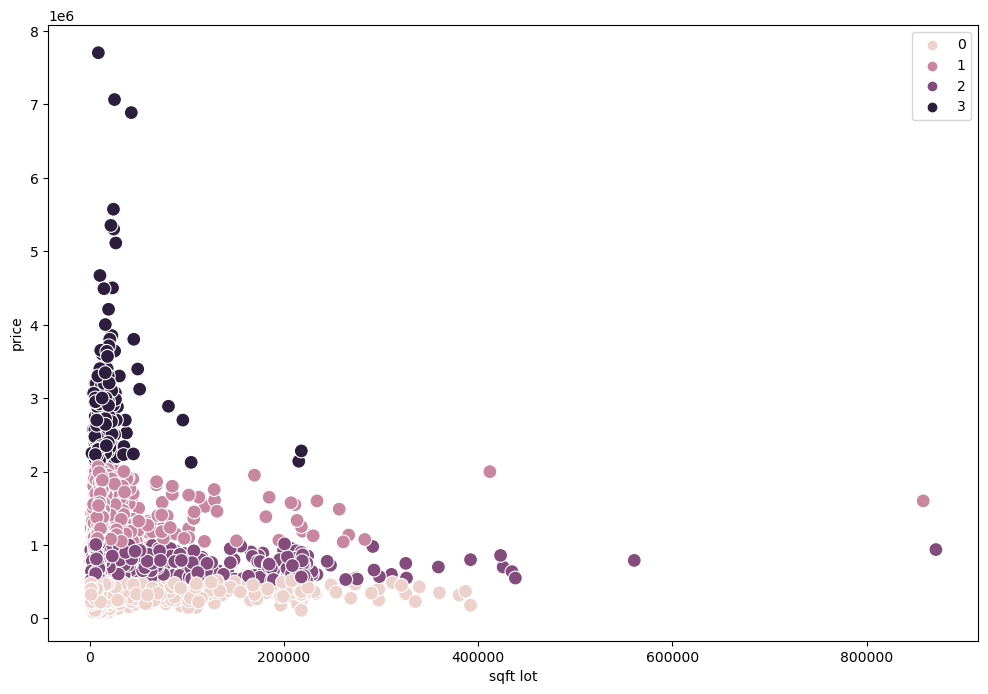

In [23]:
# Plot the clusters for the "price" and "sqft_lot15" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kc_sub['sqft_lot15'], y=kc_sub['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft lot') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

Surprising to see the high end and medium priced homes had smaller lot sizes. Lower priced homes had large lot sizes. 

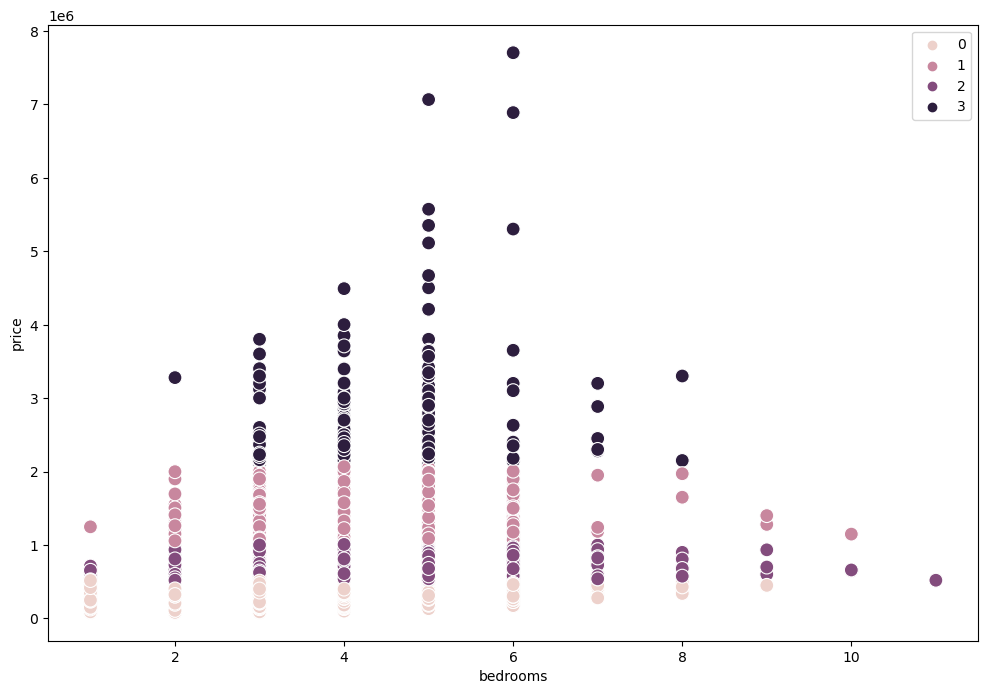

In [24]:
# Plot the clusters for the "price" and "bedrooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kc_sub['bedrooms'], y=kc_sub['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('bedrooms') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

As expected most homes were 5 bedrooms and below. It was surprising to see lower priced homes had generally more bedrooms than the top ones. 

In [25]:
# grouping by clusters to see the stats
kc_sub.loc[kc_sub['clusters'] == 3, 'cluster'] = 'dark purple'
kc_sub.loc[kc_sub['clusters'] == 2, 'cluster'] = 'medium purple'
kc_sub.loc[kc_sub['clusters'] == 1, 'cluster'] = 'pink'
kc_sub.loc[kc_sub['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\jmacs\AppData\Local\Temp\ipykernel_1360\3954566785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_sub.loc[kc_sub['clusters'] == 3, 'cluster'] = 'dark purple'


In [26]:
kc_sub.groupby('cluster').agg({'price':['mean', 'median'], 
                            'bedrooms':['mean', 'median'], 
                            'bathrooms':['mean', 'median'],
                            'sqft_living15':['mean', 'median'],
                            'sqft_lot15':['mean', 'median'],
                            'floors':['mean', 'median'],
                            'condition':['mean', 'median'],
                            'grade':['mean', 'median']})

price             bedrooms        bathrooms         \
                       mean     median      mean median      mean median   
cluster                                                                    
dark purple    2.806109e+06  2528500.0  4.352632    4.0  3.873684   3.75   
light pink     3.453275e+05   345000.0  3.161300    3.0  1.860062   1.75   
medium purple  6.893573e+05   660000.0  3.608240    4.0  2.362443   2.50   
pink           1.359100e+06  1295000.0  4.038305    4.0  3.077832   3.00   

              sqft_living15            sqft_lot15             floors         \
                       mean  median          mean   median      mean median   
cluster                                                                       
dark purple     3516.910526  3470.0  18656.873684  14100.0  1.881579    2.0   
light pink      1706.522446  1630.0  10918.271827   7560.0  1.387539    1.0   
medium purple   2270.912636  2200.0  14970.384594   7410.0  1.621813    2.0   
pink            3016.995110  2950.0  18146.568052  10125.0  1.799511    2.0   

              condition             grade         
                   mean median       mean median  
cluster                                           
dark purple    3.505263    3.0  10.752632   11.0  
light pink     3.384365    3.0   7.126625    7.0  
medium purple  3.443021    3.0   8.187819    8.0  
pink           3.466993    3.0   9.637327   10.0

Looking at these statistics, you can see a lot of similarities between all the homes. While the higher priced homes averaged higher grades their conditions were averaging out about the same. One thing is clear about King County sales, if you wanted to buy a home in the middle range price and grade, you would still be looking at over $600,000 to $1,000,000. 

In [27]:
# exporting kc_house_data dataframe
kc_sub.to_csv(os.path.join(path, 'kc_house_data_cluster_subset.csv'))